# Physics Informed Neural Network
Physics Informed Neural Networks (PINNs) are a class of deep learning models that incorporate physical laws, typically expressed as partial differential equations (PDEs), into the training process. By embedding these equations into the loss function, PINNs enable neural networks to learn solutions that are consistent with known physics, even when data is scarce or noisy. This approach is particularly useful for solving forward and inverse problems in science, where traditional numerical methods may be computationally expensive or limited by incomplete information.

To solve a PDE you need (i) a domain (D) definition, (ii) an initial (or constrined) condition (IC), and (iii) boundary condition (BC). These requirements define a boundary value problem (BVP).
Since the aim in a PINN experiment is to find an approximate solution to a BVP, the inputs to these networks are spatiotemporal coordinates and the outputs are the solution values at those points and times.\
During training, we can distinguish a supervised component — the data-driven part (e.g., experimental data embedded in the IC) — and an unsupervised component — the equation-driven part provided by the PDE and the BC.

In this exercise we implement a PINN for a simple BVP that admits an analytic solution. This will provide the fundamental tools used subsequently for more complex problems.

**NB:** No specific Python library is suggested. Students should write the code using whichever libraries they prefer.

## BVP to solve
For simplicity (and to not spoil the fun of trying to do better), we choose the 1D heat equation:

$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}, \qquad x \in [0,L],\ t \in [0,T]$

IC: $u(x,0) = \sin\!\left(\frac{\pi x}{L}\right)$

BC: $u(0,t) = u(L,t) = 0 \quad \forall t > 0$

The analytical solution is:

$u(x,t) = \sin\!\left(\frac{\pi x}{L}\right) \exp\!\left(-\frac{\pi^2 D}{L^2} t\right)$

## 📝 Exercise Instructions

This notebook contains a series of exercises to implement a Physics-Informed Neural Network (PINN) for solving the 1D heat equation. Throughout the notebook, you'll find:

- **TODO comments**: Indicating code you need to implement
- **Hints**: Providing guidance on implementation details  
- **Test cells**: Automated tests to validate your implementations (using `test_pinn.py`)

**How to use this notebook:**

1. Read each task description carefully
2. Implement the required code in the cells marked with `TODO` comments
3. Run the test cells to validate your implementation
4. Fix any issues before moving to the next section
5. All tests should pass before you can successfully train the PINN

**Test Suite:**

A test suite (`test_pinn.py`) is provided to automatically validate your implementations. Test cells will:
- ✅ Show **PASSED** tests in green
- ❌ Show **FAILED** tests with error messages in red
- ⚠️ Show **WARNINGS** for optional features or potential issues

Good luck! 🚀

---

## 1. Domain definition

To solve this equation using a PINN model, you need to define the computational domain and sample points from it.

**Task 1.1:** Create a Python `Class` called `Geometry` with the following specifications:

**Initialization:**
- Input: geometric and topological information of the domain (spatial domain `[0, L]`, temporal domain `[t_start, t_end]`)
- Store these parameters for later use

**Required Methods:**

1. **Method `sample_interior(N1)`** - Sample interior domain points
   - Input: `N1` (integer) - number of points to sample
   - Output: Array of shape `(N1, 2)` containing random `(x, t)` pairs where `x ∈ (0, L)` and `t ∈ (t_start, t_end)`
   - Note: Boundary points should be excluded (i.e., `x ≠ 0` and `x ≠ L`)

2. **Method `sample_boundary(N2)`** - Sample boundary points
   - Input: `N2` (integer) - number of points to sample
   - Output: Array of shape `(N2, 2)` containing random `(x, t)` pairs where `x ∈ {0, L}` and `t ∈ (t_start, t_end)`
   - Note: These points should be at the spatial boundaries only

3. **Method `sample_initial(N3)`** - Sample initial condition points
   - Input: `N3` (integer) - number of points to sample
   - Output: Array of shape `(N3, 2)` containing random `(x, 0)` pairs where `x ∈ [0, L]` and `t = 0`
   - Note: These points are for enforcing the initial condition

4. **Method `sample_at_time(N4, t1)`** (Optional but recommended)
   - Input: `N4` (integer) - number of points, `t1` (float) - specific time
   - Output: Array of shape `(N4, 2)` containing random `(x, t1)` pairs
   - Note: Useful for future exercises and visualization

**⚠️ Important:** Each call to these methods should return a *different* set of random points. Make sure to handle randomness appropriately in your implementation.

In [1]:
# inital imports
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from jax import random, grad, jit, vmap
from scipy.interpolate import interp1d



In [ ]:
class Geometry:
    """
    Geometry class for defining the computational domain and sampling points.
    
    Domain: x ∈ [0, L], t ∈ [t_start, t_end]
    """
    def __init__(self, L=10.0, N=100, t_start=0.0, t_end=1.0, Nt=100):
        """
        Initialize the geometry.
        
        Parameters:
        -----------
        L : float
            Length of the spatial domain
        N : int
            Number of grid points for visualization
        t_start : float
            Start time
        t_end : float
            End time
        Nt : int
            Number of time points for visualization
        """
        # TODO: Store the domain parameters
        # Hint: Save L, t_start, t_end, etc. as instance attributes
        self.L = L
        self.N = N
        self.t_start = t_start
        self.t_end = t_end
        self.Nt = Nt
        self.dx = L / N
        self.dt = (t_end - t_start) / Nt
        # Grid points for visualization
        self.x = jnp.linspace(0, L, N)
        self.t = jnp.linspace(t_start, t_end, Nt)

    def sample_interior(self, key, N1):
        """
        Sample N1 random points in the interior of the domain (boundaries excluded).
        
        Parameters:
        -----------
        key : jax.random.PRNGKey
            Random key for JAX random number generation
        N1 : int
            Number of points to sample
            
        Returns:
        --------
        points : array of shape (N1, 2)
            Array containing (x, t) pairs where x ∈ (0, L) and t ∈ (t_start, t_end)
        """
        # TODO: Sample N1 random points in the interior domain
        # Hint: Use random.uniform() to sample x in (0, L) and t in (t_start, t_end)
        # Hint: Use random.split() to create separate keys for x and t
        # Hint: Stack x and t horizontally using jnp.hstack()
        raise NotImplementedError("Implement sample_interior method")
    
    def sample_boundary(self, key, N2):
        """
        Sample N2 random points on the spatial boundaries x=0 and x=L.
        
        Parameters:
        -----------
        key : jax.random.PRNGKey
            Random key for JAX random number generation
        N2 : int
            Number of points to sample (should be even for equal distribution)
            
        Returns:
        --------
        points : array of shape (N2, 2)
            Array containing (x, t) pairs where x ∈ {0, L} and t ∈ (t_start, t_end)
        """
        # TODO: Sample N2 random points on the boundaries (x=0 and x=L)
        # Hint: Split N2 points between left (x=0) and right (x=L) boundaries
        # Hint: Use jnp.zeros() and jnp.full() to create boundary x-coordinates
        # Hint: Sample random t values using random.uniform()
        raise NotImplementedError("Implement sample_boundary method")
    
    def sample_initial(self, key, N3):
        """
        Sample N3 random points at the initial time t=0.
        
        Parameters:
        -----------
        key : jax.random.PRNGKey
            Random key for JAX random number generation
        N3 : int
            Number of points to sample
            
        Returns:
        --------
        points : array of shape (N3, 2)
            Array containing (x, 0) pairs where x ∈ [0, L] and t = 0
        """
        # TODO: Sample N3 random points at t=0
        # Hint: Sample random x values in [0, L]
        # Hint: Set all t values to 0 using jnp.zeros()
        raise NotImplementedError("Implement sample_initial method")
    
    def sample_at_time(self, key, N4, t1):
        """
        Sample N4 random points at a specific time t1.
        (Optional method - useful for inverse problems and visualization)
        
        Parameters:
        -----------
        key : jax.random.PRNGKey
            Random key for JAX random number generation
        N4 : int
            Number of points to sample
        t1 : float
            Specific time value
            
        Returns:
        --------
        points : array of shape (N4, 2)
            Array containing (x, t1) pairs where x ∈ [0, L]
        """
        # TODO (OPTIONAL): Sample N4 random points at time t1
        # Hint: Sample random x values in [0, L]
        # Hint: Set all t values to t1 using jnp.full()
        raise NotImplementedError("Implement sample_at_time method (optional)")


## 1.5 Test Your Geometry Implementation

Run the following cell to test your `Geometry` class implementation. The test suite will check:
- Proper initialization
- Correct output shapes
- Points sampled in the right domains
- Randomness of sampling

Fix any issues before proceeding to the next section.

In [ ]:
# Test the Geometry class
from test_pinn import test_geometry

test_geometry(Geometry, verbose=True)

## 2. Domain Visualization & Validation

**Task 2.1:** Verify your `Geometry` class implementation

Create a visualization that displays sampled points in the `(x, t)` plane with:
- Interior points (from `sample_interior`) in one color
- Boundary points (from `sample_boundary`) in another color  
- Initial condition points (from `sample_initial`) in a third color

**Questions to consider:**
1. Does your visualization show that points are sampled from the correct regions?
2. Are the boundary points only at `x = 0` and `x = L`?
3. Are the initial condition points only at `t = 0`?
4. What would be a good choice of `(N1, N2, N3)` to adequately sample the domain? Consider:
   - The relative importance of each constraint (PDE, BC, IC)
   - The domain size and dimensionality
   - Computational cost vs. accuracy trade-offs

In [ ]:
# Define domain parameters
L = 10.0          # Spatial domain length
t_start = 0.0     # Start time
t_end = 1.0       # End time

# Create geometry object
geo = Geometry(L=L, N=100, t_start=t_start, t_end=t_end, Nt=100)

# Sample points for visualization
key = random.PRNGKey(0)
N1 = 1000  # Interior points
N2 = 200   # Boundary points
N3 = 200   # Initial condition points

try:
    # Generate different types of points
    key, subkey1, subkey2, subkey3 = random.split(key, 4)
    points_interior = geo.sample_interior(subkey1, N1)
    points_boundary = geo.sample_boundary(subkey2, N2)
    points_initial = geo.sample_initial(subkey3, N3)

    # Visualize the sampled points
    plt.figure(figsize=(10, 6))
    plt.scatter(points_interior[:, 0], points_interior[:, 1], 
                label='Interior (PDE)', alpha=0.5, s=10)
    plt.scatter(points_boundary[:, 0], points_boundary[:, 1], 
                label='Boundary (BC)', alpha=0.7, s=20)
    plt.scatter(points_initial[:, 0], points_initial[:, 1], 
                label='Initial (IC)', alpha=0.7, s=20)
    plt.xlim(-0.5, L+0.5)
    plt.ylim(-0.05, t_end+0.05)
    plt.xlabel('x (spatial coordinate)')
    plt.ylabel('t (time)')
    plt.title('Sampled Points in the (x,t) Domain')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
except NotImplementedError as e:
    print(f"⚠️  Cannot visualize: {e}")
    print("Please implement the Geometry methods first.")

## 3. Neural Network Architecture

**Task 3.1:** Define a Neural Network that will approximate the solution `u(x, t)`

**Network Requirements:**

1. **Architecture constraints:**
   - Input layer: dimension = 2 (representing `x` and `t`)
   - Hidden layers: number and width are yours to choose (see tips below)
   - Output layer: dimension = 1 (representing `u(x, t)`)
   - Must satisfy the universal approximation theorem

2. **Activation function:**
   - Must be continuously differentiable (the network needs to compute derivatives)
   - Common choices: `tanh`, `sigmoid`, `softplus`, `GELU`
   - Avoid: `ReLU` (non-differentiable at 0, though often works in practice)

3. **Input/Output specification:**
   - Input: Array of shape `(N, 2)` containing `(x, t)` coordinates
   - Output: Array of shape `(N, 1)` containing predicted `u(x, t)` values

**💡 Tips:**

1. **Model capacity:** Start simple, then increase complexity if needed
   - For this 1D heat equation, try starting with 2-3 hidden layers of 20-50 neurons each
   - If the model doesn't learn well, consider increasing depth or width
   - If training is slow or unstable, try reducing complexity

2. **Parameter initialization:** This is critical for PINN training!
   - **Problem:** Random normal initialization often leads to trivial solutions (e.g., `u ≈ 0` everywhere)
   - **Solutions:**
     - Use **Glorot/Xavier uniform initialization** (strongly recommended)
     - Alternatively, use careful loss weighting (covered later)
   - Most deep learning libraries provide Glorot initialization (e.g., `glorot_uniform` in Keras/JAX)

3. **Implementation tips:**
   - Your network should be a callable function/class that takes `(x, t)` coordinates and returns `u` predictions
   - Ensure you can access intermediate gradients (needed for computing derivatives in the loss function)

In [ ]:
from jax.nn.initializers import glorot_uniform

class Pinn:
    """
    Physics-Informed Neural Network for approximating the solution u(x, t).
    
    The network takes (x, t) coordinates as input and outputs u(x, t) predictions.
    Uses Glorot uniform initialization to avoid trivial solutions.
    """
    
    def __init__(self, key, layers):
        """
        Initialize the PINN.
        
        Parameters:
        -----------
        key : jax.random.PRNGKey
            Random key for parameter initialization
        layers : list of int
            Architecture specification, e.g., [2, 20, 20, 20, 1]
            - First element: input dimension (2 for x and t)
            - Middle elements: hidden layer widths
            - Last element: output dimension (1 for u)
        """
        self.layers = layers
        self.params = self.initialize_params(key, layers)

    def initialize_params(self, key, layers):
        """
        Initialize network parameters using Glorot uniform initialization.
        This helps avoid convergence to trivial solutions (u ≈ 0 everywhere).
        
        Returns:
        --------
        params : list of tuples
            Each tuple contains (weights, biases) for one layer
        """
        # TODO: Initialize network parameters with Glorot uniform initialization
        # Hint: Use random.split() to create separate keys for each layer
        # Hint: Use glorot_uniform()(key, shape) to initialize weights
        # Hint: Initialize biases to zero using jnp.zeros()
        # Hint: Store each layer's (W, b) as a tuple in a list
        # Hint: You need len(layers)-1 sets of parameters (one per connection)
        raise NotImplementedError("Implement initialize_params method")

    def neural_net(self, params, x):
        """
        Forward pass through the network.
        
        Parameters:
        -----------
        params : list of tuples
            Network parameters (weights and biases)
        x : array of shape (N, 2)
            Input coordinates (x, t)
            
        Returns:
        --------
        output : array of shape (N, 1)
            Predicted values u(x, t)
        """
        # TODO: Implement forward pass through the network
        # Hint: Loop through all layers except the last one
        # Hint: Apply tanh activation for hidden layers: jnp.tanh(jnp.dot(x, W) + b)
        # Hint: Last layer has no activation (linear output)
        # Hint: Each layer transforms: x = activation(x @ W + b)
        raise NotImplementedError("Implement neural_net method")

    def __call__(self, x):
        """
        Make the network callable: pinn(x) instead of pinn.neural_net(pinn.params, x)
        """
        return self.neural_net(self.params, x)

## 4. Neural Network Validation

**Task 4.1:** Test your network implementation

Before moving to training, verify that:
1. Your network accepts inputs of shape `(N, 2)` and produces outputs of shape `(N, 1)`
2. You can generate sample points using your `Geometry` class and pass them through the network
3. The output values are reasonable (not `NaN` or extremely large)

Run the test cell below to validate your PINN implementation.

In [ ]:
# Test the PINN implementation
from test_pinn import test_pinn

layers = [2, 20, 20, 20, 1]  # Architecture: 2 inputs -> 3 hidden layers (20 neurons each) -> 1 output
key = random.PRNGKey(0)

try:
    pinn = Pinn(key, layers)
    test_pinn(Pinn, verbose=True)
    
    # Additional manual test
    print("\nManual forward pass test:")
    x_test = jnp.array([[1.0, 0.5],   # (x=1.0, t=0.5)
                         [2.0, 0.5]])   # (x=2.0, t=0.5)
    u_test = pinn(x_test)
    print("Test inputs (x, t):")
    print(x_test)
    print("\nTest outputs u(x, t):")
    print(u_test)
except NotImplementedError as e:
    print(f"⚠️  Cannot test PINN: {e}")
    print("Please implement the Pinn methods first.")

## 5. Loss Functions

**Task 5.1:** Implement the physics-informed loss function

The loss function is what makes this network "physics-informed". It enforces the PDE, boundary conditions, and initial conditions. We split it into three components:

---

### 5.1 PDE Residual Loss: $\mathcal{L}_{PDE}$

This enforces that the network satisfies the heat equation at interior points.

**Mathematical definition:**

$$\mathcal{L}_{PDE}= \frac{1}{N_1} \sum_{i=1}^{N_1} \left(\frac{\partial}{\partial t}NN(x_i,t_i)-D\frac{\partial^2}{\partial x^2}NN(x_i,t_i)\right)^2$$

**Implementation requirements:**
- **Input:** 
  - Interior points `(x, t)` from `sample_interior(N1)` - shape `(N1, 2)`
  - Network prediction function `NN(x, t)`
  - Diffusion coefficient `D`
- **Steps:**
  1. For each point `(xi, ti)`, compute `u = NN(xi, ti)`
  2. Compute time derivative: `∂u/∂t` using automatic differentiation
  3. Compute second spatial derivative: `∂²u/∂x²` using automatic differentiation
  4. Calculate residual: `r = ∂u/∂t - D·∂²u/∂x²`
  5. Return mean squared residual: `mean(r²)`
- **Output:** Scalar value representing PDE residual loss

---

### 5.2 Boundary Condition Loss: $\mathcal{L}_{BC}$

This enforces Dirichlet boundary conditions: `u(0, t) = u(L, t) = 0` for all `t > 0`.

**Mathematical definition:**

$$\mathcal{L}_{BC}= \frac{1}{N_2} \sum_{i=1}^{N_2} (NN(x_i, t_i))^2 \quad \text{where } x_i \in \{0, L\}$$

**Implementation requirements:**
- **Input:**
  - Boundary points from `sample_boundary(N2)` - shape `(N2, 2)`, where `x ∈ {0, L}`
  - Network prediction function `NN(x, t)`
- **Steps:**
  1. Evaluate network at boundary points: `u_boundary = NN(x_boundary, t_boundary)`
  2. Return mean squared predictions: `mean(u_boundary²)`
- **Output:** Scalar value representing boundary condition loss
- **Note:** Since the boundary condition is `u = 0`, we simply penalize any non-zero predictions

---

### 5.3 Initial Condition Loss: $\mathcal{L}_{IC}$

This is the *supervised* component, enforcing the initial condition: `u(x, 0) = sin(πx/L)`.

**Mathematical definition:**

$$\mathcal{L}_{IC}=\frac{1}{N_3} \sum_{i=1}^{N_3} (NN(x_i,0)-\sin(\pi x_i/L))^2$$

**Implementation requirements:**
- **Input:**
  - Initial condition points from `sample_initial(N3)` - shape `(N3, 2)`, where `t = 0`
  - Network prediction function `NN(x, t)`
  - Domain length `L`
- **Steps:**
  1. Evaluate network at initial points: `u_pred = NN(x_initial, 0)`
  2. Compute exact initial condition: `u_exact = sin(π·x_initial/L)`
  3. Return mean squared error: `mean((u_pred - u_exact)²)`
- **Output:** Scalar value representing initial condition loss

---

### 5.4 Total Loss

$$\mathcal{L}_{total} = \mathcal{L}_{PDE} + \mathcal{L}_{BC} + \mathcal{L}_{IC}$$

Optionally, you can use weighted losses: $\mathcal{L}_{total} = w_1\mathcal{L}_{PDE} + w_2\mathcal{L}_{BC} + w_3\mathcal{L}_{IC}$

---

**💡 Implementation Tips:**

1. **Automatic differentiation:** Use your framework's built-in tools
   - TensorFlow: `tf.GradientTape` (set `persistent=True` to compute multiple derivatives)
   - PyTorch: `torch.autograd.grad`
   - JAX: `jax.grad` or `jax.jacfwd`/`jax.jacrev`

2. **Computing higher-order derivatives:**
   - For `∂²u/∂x²`, you need to differentiate twice with respect to `x`
   - Ensure your automatic differentiation context can handle multiple derivative operations

3. **Debugging:** Test each loss component separately with known simple functions before combining them

In [ ]:
import optax

def loss_pde(params, pinn, points, D):
    """
    Compute the PDE residual loss: L_PDE.
    
    Enforces the heat equation: ∂u/∂t = D * ∂²u/∂x²
    
    Parameters:
    -----------
    params : list
        Network parameters
    pinn : Pinn
        PINN object
    points : array of shape (N1, 2)
        Interior points (x, t)
    D : float
        Diffusion coefficient
        
    Returns:
    --------
    loss : float
        Mean squared PDE residual
    """
    def pde_residual(point):
        """Compute PDE residual at a single point."""
        x, t = point[0], point[1]
        
        # Define function u(x, t) for automatic differentiation
        def u_fn(x_val, t_val):
            input_point = jnp.array([[x_val, t_val]])
            return pinn.neural_net(params, input_point)[0, 0]
        
        # TODO: Compute derivatives using JAX automatic differentiation
        # Hint: Use grad(u_fn, argnums=1)(x, t) for ∂u/∂t
        # Hint: Use grad(grad(u_fn, argnums=0), argnums=0)(x, t) for ∂²u/∂x²
        # Hint: PDE residual is: ∂u/∂t - D * ∂²u/∂x²
        # Hint: Return the squared residual
        raise NotImplementedError("Implement PDE residual computation")
    
    # Vectorize the residual computation over all points
    residuals = vmap(pde_residual)(points)
    
    return jnp.mean(residuals)


def loss_bc(params, pinn, points):
    """
    Compute the boundary condition loss: L_BC.
    
    Enforces Dirichlet BC: u(0, t) = u(L, t) = 0
    
    Parameters:
    -----------
    params : list
        Network parameters
    pinn : Pinn
        PINN object
    points : array of shape (N2, 2)
        Boundary points where x ∈ {0, L}
        
    Returns:
    --------
    loss : float
        Mean squared boundary predictions (should be zero)
    """
    # TODO: Implement boundary condition loss
    # Hint: Evaluate the network at boundary points using pinn.neural_net(params, points)
    # Hint: Since BC is u=0, compute mean((predictions)²)
    raise NotImplementedError("Implement loss_bc")


def loss_ic(params, pinn, points, L):
    """
    Compute the initial condition loss: L_IC.
    
    Enforces IC: u(x, 0) = sin(πx/L)
    
    Parameters:
    -----------
    params : list
        Network parameters
    pinn : Pinn
        PINN object
    points : array of shape (N3, 2)
        Initial condition points where t = 0
    L : float
        Domain length
        
    Returns:
    --------
    loss : float
        Mean squared error between predictions and exact IC
    """
    # TODO: Implement initial condition loss
    # Hint: Get network predictions at t=0 using pinn.neural_net(params, points)
    # Hint: Compute exact initial condition: sin(πx/L) where x = points[:, 0:1]
    # Hint: Return mean squared error between predictions and exact values
    raise NotImplementedError("Implement loss_ic")


def total_loss(params, pinn, points_interior, points_boundary, points_initial, D, L):
    """
    Compute the total physics-informed loss.
    
    L_total = L_PDE + L_BC + L_IC
    
    Parameters:
    -----------
    params : list
        Network parameters
    pinn : Pinn
        PINN object
    points_interior : array
        Interior domain points
    points_boundary : array
        Boundary points
    points_initial : array
        Initial condition points
    D : float
        Diffusion coefficient
    L : float
        Domain length
        
    Returns:
    --------
    total : float
        Total loss value
    components : tuple
        Individual loss components (l_pde, l_bc, l_ic) for monitoring
    """
    # TODO: Implement total loss
    # Hint: Compute each loss component using the functions above
    # Hint: Sum them to get total loss
    # Hint: Return (total, (l_pde, l_bc, l_ic)) for monitoring
    raise NotImplementedError("Implement total_loss")

## 6. Loss Function Validation

**Task 6.1:** Test your loss implementations

Before training, verify that each loss component works correctly:

1. **Test with simple inputs:**
   - Sample a small number of points (e.g., `N1=10`, `N2=10`, `N3=10`)
   - Compute each loss term separately
   - Check that all values are finite (not `NaN` or `Inf`)

2. **Sanity checks:**
   - For a randomly initialized network, all losses should be non-zero
   - `L_BC` should be relatively small if the network happens to predict values close to zero at boundaries
   - `L_IC` depends on how far the random predictions are from `sin(πx/L)`

3. **Test derivatives:**
   - Ensure automatic differentiation is computing gradients correctly
   - Try evaluating `∂u/∂t` and `∂²u/∂x²` at a single point and verify they are computable

**Debugging tip:** If you encounter errors, test each loss function independently before combining them.

## 6.5 Run All Tests

Before proceeding to training, run this comprehensive test to ensure all components are working correctly:

In [ ]:
# Run comprehensive test suite
from test_pinn import run_all_tests

try:
    all_passed = run_all_tests(
        Geometry=Geometry,
        Pinn=Pinn,
        loss_pde=loss_pde,
        loss_bc=loss_bc,
        loss_ic=loss_ic,
        total_loss=total_loss,
        train_pinn=None,  # We'll test training separately
        verbose=True
    )
    
    if all_passed:
        print("✅ All core components are implemented correctly!")
        print("You can now proceed to implementing the training function.")
    else:
        print("⚠️  Please fix the failing tests before proceeding to training.")
        
except Exception as e:
    print(f"❌ Error running tests: {e}")
    print("Make sure all required functions are defined.")

In [ ]:
# Test the loss functions with test suite
from test_pinn import test_loss_functions

try:
    test_loss_functions(loss_pde, loss_bc, loss_ic, total_loss, Pinn, Geometry, verbose=True)
    
    # Additional manual test
    print("\nManual loss computation test:")
    key = random.PRNGKey(0)
    
    # Sample test points
    N1_test = 100
    N2_test = 20
    N3_test = 20
    
    key, subkey1, subkey2, subkey3 = random.split(key, 4)
    points_interior = geo.sample_interior(subkey1, N1_test)
    points_boundary = geo.sample_boundary(subkey2, N2_test)
    points_initial = geo.sample_initial(subkey3, N3_test)
    
    # Compute each loss component
    D_test = 3
    l_pde = loss_pde(pinn.params, pinn, points_interior, D_test)
    l_bc = loss_bc(pinn.params, pinn, points_boundary)
    l_ic = loss_ic(pinn.params, pinn, points_initial, geo.L)
    
    print("Loss components for untrained network:")
    print(f"  L_PDE (PDE residual):        {l_pde:.6f}")
    print(f"  L_BC  (Boundary conditions): {l_bc:.6f}")
    print(f"  L_IC  (Initial condition):   {l_ic:.6f}")
    print(f"  L_total:                     {l_pde + l_bc + l_ic:.6f}")
except NotImplementedError as e:
    print(f"⚠️  Cannot test losses: {e}")
    print("Please implement the loss functions first.")

## 7. Training Loop

**Task 7.1:** Implement the training procedure

Now that all components are ready, implement the optimization loop to train your PINN.

---

### 7.1 Core Training Operations

Your training loop should perform these steps at each iteration:

1. **Sample points:** Generate new random sets of:
   - Interior points `(x, t)` using `sample_interior(N1)`
   - Boundary points `(x, t)` using `sample_boundary(N2)`
   - Initial condition points `(x, 0)` using `sample_initial(N3)`

2. **Forward pass & loss computation:**
   - Evaluate the network at all sampled points
   - Compute `L_PDE`, `L_BC`, `L_IC`, and `L_total`

3. **Backward pass & optimization:**
   - Compute gradients of `L_total` with respect to network parameters
   - Update parameters using an optimizer (Adam recommended)

4. **Monitoring:**
   - Print/log loss values periodically
   - Track the best model (lowest total loss)
   - Save checkpoints when a new minimum is reached

---

### 7.2 Implementation Suggestions

For clean, readable code, consider organizing as follows:

**Option A: Unified PDE function**
- Create a function `compute_pde_loss(model, interior_points, boundary_points, initial_points, D, L)` that:
  - Takes all inputs and hyperparameters
  - Returns all loss components `(L_total, L_PDE, L_BC, L_IC)`
- Your training loop then only needs:
  1. Sample points from `Geometry` class
  2. Call `compute_pde_loss()` within gradient computation context
  3. Apply optimizer step
  4. Monitor and save

**Option B: Separate components**
- Keep loss functions separate as implemented in Task 5
- Call them individually in the training loop

---

### 7.3 Training Hyperparameters

**Optimizer:**
- **Recommended:** Adam with learning rate `1e-3` to `1e-4`
- **Alternative:** Try L-BFGS for fine-tuning after initial Adam training (see tips below)

**Number of epochs:**
- Start with 5,000-10,000 epochs
- Monitor loss curves to determine if more training is needed

**Sampling sizes:**
- Typical values: `N1=1000`, `N2=200`, `N3=200`
- Adjust based on computational resources and convergence behavior

---

### 7.4 Tips & Best Practices

**1. Loss weighting (if needed):**
   - If one loss component dominates, consider weighting: `L_total = w1·L_PDE + w2·L_BC + w3·L_IC`
   - Start with equal weights (1, 1, 1) and adjust if necessary

**2. Advanced optimization - L-BFGS:**
   - Some PINN literature recommends [L-BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) (second-order optimizer)
   - **Strategy:** Train with Adam first, then fine-tune with L-BFGS
   - Not required but can improve convergence

**3. Monitoring:**
   - Print each loss component separately to diagnose issues
   - If one component doesn't decrease, check its implementation

**4. Stopping criterion:**
   - **Key question:** *Without a validation set, how do you decide when to stop training?*
   - Consider:
     - Has the total loss plateaued?
     - Are all three loss components sufficiently small?
     - Does the solution look physically reasonable?
     - Compare with analytical solution (if available, as in this exercise)

**5. Checkpointing:**
   - Save the model parameters whenever `L_total` reaches a new minimum
   - This protects against divergence in later epochs

---

### 7.5 Expected Behavior

During training, you should observe:
- All loss components decreasing over time
- `L_IC` typically decreases fastest (it's supervised)
- `L_PDE` often decreases more slowly
- Total loss should eventually plateau at a low value (e.g., < 0.01 or lower)

In [ ]:
def train_pinn(pinn, geo, D, L, n_epochs=5000, N1=1000, N2=200, N3=200, learning_rate=1e-3):
    """
    Train the Physics-Informed Neural Network.
    
    Parameters:
    -----------
    pinn : Pinn
        PINN object to train
    geo : Geometry
        Geometry object for sampling points
    D : float
        Diffusion coefficient
    L : float
        Domain length
    n_epochs : int
        Number of training iterations
    N1, N2, N3 : int
        Number of interior, boundary, and initial condition points per epoch
    learning_rate : float
        Adam optimizer learning rate
        
    Returns:
    --------
    loss_history : list
        Total loss at each epoch
    loss_components : dict
        History of individual loss components
    """
    # TODO: Implement the training loop
    # Hint: Initialize Adam optimizer using optax.adam(learning_rate)
    # Hint: Initialize optimizer state with optimizer.init(pinn.params)
    # Hint: Track best_loss and best_params to save the best model
    # Hint: Create loss_history list and loss_components dict to track losses
    
    # TODO: For each epoch:
    #   1. Sample new random points using geo.sample_interior/boundary/initial
    #   2. Compute loss and gradients using jax.value_and_grad(total_loss, has_aux=True)
    #   3. Update parameters: updates, opt_state = optimizer.update(grads, opt_state)
    #                        pinn.params = optax.apply_updates(pinn.params, updates)
    #   4. Store loss values in history
    #   5. Print progress every 500 epochs
    
    # TODO: After training, restore best parameters
    # TODO: Return loss_history and loss_components
    
    raise NotImplementedError("Implement train_pinn function")


# Train the PINN
print("="*70)
print("TRAINING PHYSICS-INFORMED NEURAL NETWORK")
print("="*70)

# Define problem parameters
L = 10.0
D = 3

# Create a fresh PINN
layers = [2, 20, 20, 20, 1]
key = random.PRNGKey(42)

try:
    pinn = Pinn(key, layers)
    
    # Train with reduced epochs for exercise (increase for better results)
    loss_history, loss_components = train_pinn(
        pinn, geo, D, L, 
        n_epochs=1000,  # Increase to 5000-10000 for better results
        N1=1000, N2=200, N3=200,
        learning_rate=1e-3
    )

    # Plot training history
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Total loss
    axes[0].plot(loss_history, linewidth=1.5)
    axes[0].set_yscale('log')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Total Loss')
    axes[0].set_title('Training Loss History')
    axes[0].grid(True, alpha=0.3)

    # Individual components
    axes[1].plot(loss_components['pde'], label='L_PDE', linewidth=1.5)
    axes[1].plot(loss_components['bc'], label='L_BC', linewidth=1.5)
    axes[1].plot(loss_components['ic'], label='L_IC', linewidth=1.5)
    axes[1].set_yscale('log')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss Components')
    axes[1].set_title('Individual Loss Components')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    
except NotImplementedError as e:
    print(f"\n⚠️  Cannot train: {e}")
    print("Please implement the train_pinn function first.")

## 8. Performance Evaluation

**Task 8.1:** Evaluate and analyze your trained PINN

Now that your model is trained, assess its performance and understand its behavior.

---

### 8.1 Quantitative Metrics

**Primary metric - Mean Absolute Error (MAE):**

Since we have the analytical solution for this problem:

$$u_{exact}(x,t) = \sin\!\left(\frac{\pi x}{L}\right) \exp\!\left(-\frac{\pi^2 D}{L^2} t\right)$$

Compute:
- **Absolute Error:** `|u_pred(x,t) - u_exact(x,t)|`
- **Mean Absolute Error:** Average absolute error over the domain
- **Maximum Error:** Worst-case pointwise error
- **Relative Error:** `|u_pred - u_exact| / |u_exact|` (where `u_exact ≠ 0`)

**Questions to answer:**
1. What is the average error across the entire domain?
2. Where is the error largest? (boundaries? interior? early/late times?)
3. Is the error acceptable for your application?

---

### 8.2 Qualitative Assessment

**Visualization tasks:**

1. **Solution comparison:**
   - Plot `u_pred(x,t)` as a heatmap/contour plot
   - Plot `u_exact(x,t)` as a heatmap/contour plot
   - Visually compare: Does the PINN capture the correct behavior?

2. **Error visualization:**
   - Plot absolute error `|u_pred - u_exact|` as a heatmap
   - Identify regions of high/low error

3. **Time slices:**
   - Plot `u(x, t)` vs `x` at several fixed times (e.g., `t = 0, 0.25, 0.5, 0.75, 1.0`)
   - Compare PINN predictions with analytical solution
   - Does the solution decay correctly over time?

4. **Spatial profiles:**
   - Plot `u(x, t)` vs `t` at several fixed locations (e.g., `x = L/4, L/2, 3L/4`)
   - Verify exponential decay in time

---

### 8.3 Comparison with Classical Methods

**Task 8.2:** Compare PINN with numerical methods

To understand PINNs' strengths and limitations, compare with traditional PDE solvers:

**Suggested method - FTCS (Forward-Time Central-Space):**
- Simple explicit finite difference scheme for the heat equation
- Discretize in space and time: `u[n+1, i] = u[n, i] + D·dt/dx²·(u[n,i+1] - 2u[n,i] + u[n,i-1])`
- **Note:** Check stability condition: `D·dt/dx² ≤ 0.5`

**Comparison criteria:**

1. **Accuracy:**
   - Which method has lower error compared to the analytical solution?
   - How does error scale with grid resolution (for FTCS) vs network size (for PINN)?

2. **Computational cost:**
   - Training time for PINN vs solve time for FTCS
   - Memory requirements

3. **Flexibility:**
   - How easy is it to change domain size, boundary conditions, or initial conditions?
   - Which method generalizes better to new scenarios?

4. **Physical constraints:**
   - Does the PINN naturally satisfy physical properties (e.g., positivity, conservation)?
   - Compare with FTCS in this regard

---

### 8.4 Reflection Questions

1. **When would you prefer a PINN over classical methods?**
   - Consider: sparse data, inverse problems, complex geometries, parameter estimation

2. **What are the main challenges you encountered?**
   - Hyperparameter tuning? Training stability? Computational cost?

3. **How would this approach scale to higher dimensions (2D/3D)?**
   - Think about: computational complexity, sampling strategies, network architecture

4. **What happens if you reduce the number of training points?**
   - Try reducing `N1`, `N2`, or `N3` and observe the effect on accuracy

In [ ]:
# ============================================================================
# PERFORMANCE EVALUATION: Compare PINN predictions with analytical solution
# ============================================================================

try:
    # Create a grid for evaluation
    x = geo.x
    t = geo.t
    X, T = jnp.meshgrid(x, t)

    # Flatten for network evaluation
    XT = jnp.hstack((X.flatten()[:, None], T.flatten()[:, None]))

    # PINN predictions
    u_pred = pinn(XT).reshape(X.shape)

    # Analytical solution: u(x,t) = sin(πx/L) * exp(-π²Dt/L²)
    u_exact = jnp.sin(jnp.pi * X / L) * jnp.exp(-D * (jnp.pi / L)**2 * T)

    # ============================================================================
    # 8.1 Quantitative Metrics
    # ============================================================================

    mae = jnp.mean(jnp.abs(u_pred - u_exact))
    max_error = jnp.max(jnp.abs(u_pred - u_exact))
    rel_error = jnp.mean(jnp.abs(u_pred - u_exact) / (jnp.abs(u_exact) + 1e-10))

    print("\n" + "="*70)
    print("QUANTITATIVE PERFORMANCE METRICS")
    print("="*70)
    print(f"Mean Absolute Error (MAE):     {mae:.6e}")
    print(f"Maximum Absolute Error:        {max_error:.6e}")
    print(f"Mean Relative Error:           {rel_error:.6e}")
    print("="*70 + "\n")

    # ============================================================================
    # 8.2 Qualitative Assessment: Visualizations
    # ============================================================================

    # 1. Solution comparison (heatmaps)
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))

    # PINN prediction
    im1 = axes[0].pcolormesh(X, T, u_pred, shading='auto', cmap='viridis')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('t')
    axes[0].set_title('PINN Prediction: u(x,t)')
    plt.colorbar(im1, ax=axes[0], label='u')

    # Analytical solution
    im2 = axes[1].pcolormesh(X, T, u_exact, shading='auto', cmap='viridis')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('t')
    axes[1].set_title('Analytical Solution: u(x,t)')
    plt.colorbar(im2, ax=axes[1], label='u')

    # Absolute error
    residual = jnp.abs(u_pred - u_exact)
    im3 = axes[2].pcolormesh(X, T, residual, shading='auto', cmap='inferno')
    axes[2].set_xlabel('x')
    axes[2].set_ylabel('t')
    axes[2].set_title('Absolute Error: |u_pred - u_exact|')
    plt.colorbar(im3, ax=axes[2], label='Error')

    plt.tight_layout()
    plt.show()

    # ============================================================================
    # 2. Time slices: u(x, t) at fixed times
    # ============================================================================

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    times = [0.0, 0.25, 0.5, 1.0]

    for idx, t_slice in enumerate(times):
        ax = axes[idx // 2, idx % 2]
        
        # Find closest time index
        t_idx = jnp.argmin(jnp.abs(t - t_slice))
        
        # Extract predictions and exact solution at this time
        u_pred_slice = u_pred[t_idx, :]
        u_exact_slice = u_exact[t_idx, :]
        
        # Plot
        ax.plot(x, u_pred_slice, label='PINN', color='blue', linewidth=2)
        ax.plot(x, u_exact_slice, label='Analytical', color='red', 
                linestyle='--', linewidth=2)
        ax.set_xlabel('x')
        ax.set_ylabel('u')
        # set y-axis limits from -0.1 to 1.1
        ax.set_ylim(-0.1, 1.1)
        ax.set_title(f'Solution at t = {t[t_idx]:.3f}')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # ============================================================================
    # 3. Spatial profiles: u(x, t) at fixed locations
    # ============================================================================

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    x_locations = [L/4, L/2, 3*L/4]

    for idx, x_loc in enumerate(x_locations):
        # Find closest x index
        x_idx = jnp.argmin(jnp.abs(x - x_loc))
        
        # Extract predictions and exact solution at this location
        u_pred_profile = u_pred[:, x_idx]
        u_exact_profile = u_exact[:, x_idx]
        
        # Plot temporal evolution at this location
        axes[idx].plot(t, u_pred_profile, label='PINN', color='blue', linewidth=2)
        axes[idx].plot(t, u_exact_profile, label='Analytical', color='red', 
                       linestyle='--', linewidth=2)
        axes[idx].set_xlabel('t')
        axes[idx].set_ylabel('u')
        axes[idx].set_title(f'Temporal Evolution at x = {x[x_idx]:.2f}')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    
except (NotImplementedError, NameError) as e:
    print(f"\n⚠️  Cannot evaluate: {e}")
    print("Please complete the implementation and training first.")

---

# 🚀 ADVANCED / OPTIONAL EXERCISES

The following sections are **optional** and explore more advanced topics:
- **Section 8.3**: Comparison with classical numerical methods (FTCS)
- **Section 9**: Inverse problem - reconstructing initial conditions from measurements

These are excellent extensions if you want to deepen your understanding, but are **not required** for completing the core exercise.

---


Solving with FTCS method...
FTCS stability parameter (should be ≤ 0.5): 1.4775


/home/fvaselli/miniconda3/envs/jax/lib/python3.12/site-packages/jax/_src/numpy/array_constructors.py:246: RuntimeWarning: overflow encountered in cast
  out = np.asarray(object, dtype=dtype)



FTCS Method Errors:
  Mean Absolute Error: inf
  Maximum Error:       inf

Comparison:
  PINN MAE:  2.666327e-03
  FTCS MAE:  inf
  Winner:    PINN (lower MAE)


/home/fvaselli/miniconda3/envs/jax/lib/python3.12/site-packages/jax/_src/abstract_arrays.py:111: RuntimeWarning: overflow encountered in cast
  return literals.LiteralArray(np.asarray(x, dtype), weak_type=False)


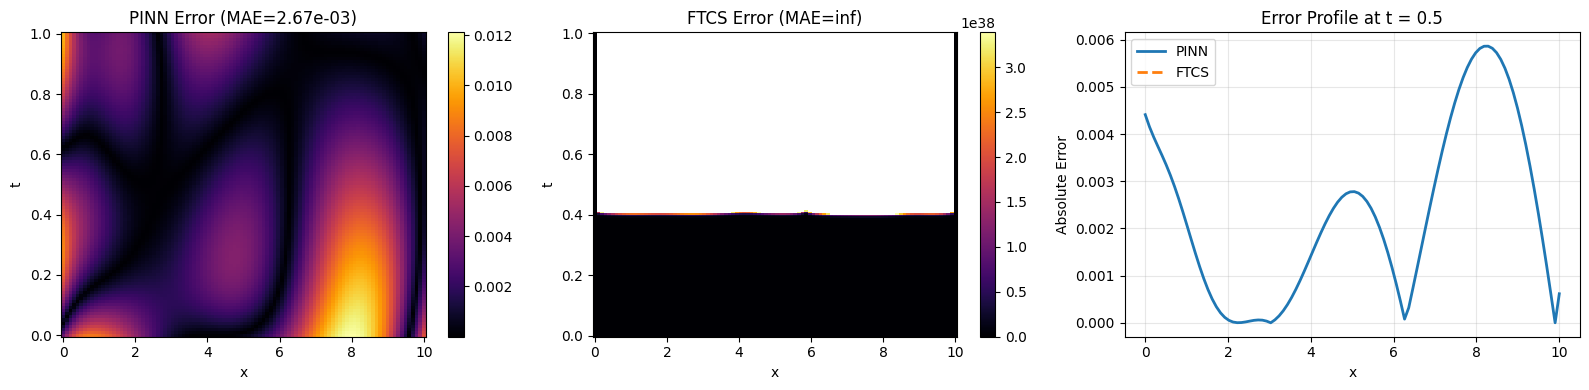

In [ ]:
# ============================================================================
# 8.3 OPTIONAL: Comparison with Classical Method: FTCS (Forward-Time Central-Space)
# ============================================================================

def solve_heat_ftcs(L, T, D, nx, nt, ic_func):
    """
    Solve the 1D heat equation using the FTCS explicit finite difference method.
    
    Parameters:
    -----------
    L : float
        Domain length
    T : float
        Final time
    D : float
        Diffusion coefficient
    nx : int
        Number of spatial grid points
    nt : int
        Number of time steps
    ic_func : function
        Initial condition function u(x, 0)
        
    Returns:
    --------
    x : array
        Spatial grid
    t : array
        Time grid
    u : array
        Solution u(x, t)
    """
    # Grid setup
    dx = L / (nx - 1)
    dt = T / (nt - 1)
    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)
    
    # Check stability condition: D*dt/dx² ≤ 0.5
    stability_param = D * dt / dx**2
    print(f"FTCS stability parameter (should be ≤ 0.5): {stability_param:.4f}")
    
    if stability_param > 0.5:
        print("WARNING: FTCS scheme may be unstable!")
    
    # Initialize solution
    u = np.zeros((nt, nx))
    u[0, :] = ic_func(x)
    
    # Time integration
    for n in range(0, nt-1):
        for i in range(1, nx-1):
            # FTCS formula: u[n+1,i] = u[n,i] + D*dt/dx² * (u[n,i+1] - 2*u[n,i] + u[n,i-1])
            u[n+1, i] = u[n, i] + stability_param * (u[n, i+1] - 2*u[n, i] + u[n, i-1])
        
        # Boundary conditions: u(0,t) = u(L,t) = 0
        u[n+1, 0] = 0
        u[n+1, -1] = 0
    
    return x, t, u


# Initial condition function
def ic_sin(x):
    return np.sin(np.pi * x / L)

# Solve using FTCS
print("\nSolving with FTCS method...")
x_ftcs, t_ftcs, u_ftcs = solve_heat_ftcs(L, t_end, D, nx=100, nt=200, ic_func=ic_sin)

# Convert to JAX arrays for comparison
u_ftcs_jax = jnp.array(u_ftcs)
X_ftcs, T_ftcs = jnp.meshgrid(x_ftcs, t_ftcs)

# Compute analytical solution on FTCS grid
u_exact_ftcs = jnp.sin(jnp.pi * X_ftcs / L) * jnp.exp(-D * (jnp.pi / L)**2 * T_ftcs)

# Compute errors
ftcs_mae = jnp.mean(jnp.abs(u_ftcs_jax - u_exact_ftcs))
ftcs_max_error = jnp.max(jnp.abs(u_ftcs_jax - u_exact_ftcs))

print(f"\nFTCS Method Errors:")
print(f"  Mean Absolute Error: {ftcs_mae:.6e}")
print(f"  Maximum Error:       {ftcs_max_error:.6e}")

print(f"\nComparison:")
print(f"  PINN MAE:  {mae:.6e}")
print(f"  FTCS MAE:  {ftcs_mae:.6e}")
print(f"  Winner:    {'PINN' if mae < ftcs_mae else 'FTCS'} (lower MAE)")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# PINN error
im1 = axes[0].pcolormesh(X, T, jnp.abs(u_pred - u_exact), shading='auto', cmap='inferno')
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title(f'PINN Error (MAE={mae:.2e})')
plt.colorbar(im1, ax=axes[0])

# FTCS error
im2 = axes[1].pcolormesh(X_ftcs, T_ftcs, jnp.abs(u_ftcs_jax - u_exact_ftcs), 
                         shading='auto', cmap='inferno')
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title(f'FTCS Error (MAE={ftcs_mae:.2e})')
plt.colorbar(im2, ax=axes[1])

# Error comparison at t=0.5
t_compare = 0.5
t_idx_pinn = jnp.argmin(jnp.abs(t - t_compare))
t_idx_ftcs = np.argmin(np.abs(t_ftcs - t_compare))

axes[2].plot(x, jnp.abs(u_pred[t_idx_pinn, :] - u_exact[t_idx_pinn, :]), 
             label='PINN', linewidth=2)
axes[2].plot(x_ftcs, np.abs(u_ftcs[t_idx_ftcs, :] - u_exact_ftcs[t_idx_ftcs, :]), 
             label='FTCS', linewidth=2, linestyle='--')
axes[2].set_xlabel('x')
axes[2].set_ylabel('Absolute Error')
axes[2].set_title(f'Error Profile at t = {t_compare}')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. 🔬 ADVANCED: Inverse Problem Challenge

**Task 9.1:** Recover the initial distribution from a later measurement (inverse problem)

This advanced exercise explores one of PINNs' most powerful capabilities: solving inverse problems.

---

### 9.1 Problem Setup

You will be provided with experimental data (*to be added soon*):
- **Initial distribution:** `u(x, 0)` at time `t = 0`
- **Diffused distribution:** `u(x, t_measurement)` at a later time `t = t_measurement`

**Your goal:** Starting from the measurement at `t = t_measurement`, reconstruct the initial distribution at `t = 0`.

This is an **inverse problem** (going backward in time) and is generally ill-posed for the heat equation due to its irreversible nature.

---

### 9.2 Implementation Strategy

**Modifications to your PINN:**

1. **Change the supervised data:**
   - Instead of using the initial condition `u(x, 0) = sin(πx/L)` as training data...
   - Use the measurement at `t = t_measurement` as your supervised constraint
   - New loss: `L_data = mean((NN(x, t_measurement) - u_measured(x, t_measurement))²)`

2. **Predict backward:**
   - Train the network to satisfy the PDE throughout `t ∈ [0, t_measurement]`
   - The network should learn to "reverse" the diffusion process
   - After training, evaluate `NN(x, 0)` to get the reconstructed initial condition

3. **Handle discrete measurements:**
   - **Challenge:** You only have discrete measurement points, not a continuous function
   - **Solution:** Use interpolation to evaluate `u_measured` at arbitrary points
   - Suggested: [Scipy interpolation](https://docs.scipy.org/doc/scipy/reference/interpolate.html) (e.g., `scipy.interpolate.interp1d` or `scipy.interpolate.CubicSpline`)

---

### 9.3 Modified Loss Function

Your new total loss should be:

$$\mathcal{L}_{total} = \mathcal{L}_{PDE} + \mathcal{L}_{BC} + \mathcal{L}_{data}$$

Where:
- `L_PDE`: Same as before (enforces heat equation throughout the domain)
- `L_BC`: Same as before (enforces boundary conditions)
- `L_data`: New supervised loss using measurements at `t = t_measurement`

Note: You're replacing `L_IC` (initial condition supervision) with `L_data` (measurement supervision).

---

### 9.4 Key Questions to Explore

**Question 9.1:** *How far back in time can you reliably reconstruct?*

Experiment with different values of `t_measurement`:
- Start with small values (e.g., `t_measurement = 0.1`)
- Gradually increase (e.g., 0.5, 1.0, 2.0, ...)
- At what point does reconstruction fail or become very inaccurate?

**Factors to investigate:**
1. **Reconstruction error vs. time:**
   - Plot reconstruction error as a function of `t_measurement`
   - Observe when error grows unacceptably large

2. **Role of noise:**
   - Add Gaussian noise to the measurement data: `u_noisy = u_measured + ε·N(0,1)`
   - How does noise affect reconstruction quality?
   - Try different noise levels

3. **Regularization:**
   - Can you improve reconstruction by adding regularization terms to the loss?
   - Example: Penalize roughness of the initial condition

4. **Physical intuition:**
   - Why does the heat equation make backward reconstruction difficult?
   - Think about information loss during diffusion
   - How does this relate to the second law of thermodynamics?

---

### 9.5 Expected Challenges

1. **Training instability:**
   - Inverse problems are typically more difficult to train
   - You may need: smaller learning rates, more iterations, better initialization

2. **Non-uniqueness:**
   - Multiple initial conditions might produce similar measurements
   - The PINN might converge to different solutions with different random seeds

3. **Sensitivity to hyperparameters:**
   - Loss weighting becomes more critical
   - Network architecture may need adjustment

**Tips:**
- Start with small `t_measurement` where the problem is easier
- Use multiple random seeds and compare results
- Visualize intermediate solutions during training to debug issues

---

### 9.6 Extension Ideas

If you complete the basic inverse problem, consider:
1. **Unknown diffusion coefficient:** Simultaneously learn `D` and initial condition
2. **Sparse measurements:** Use only a few spatial points at `t_measurement`
3. **Multiple time measurements:** Use data at several different times
4. **2D heat equation:** Extend to two spatial dimensions

INVERSE PROBLEM: RECONSTRUCTING INITIAL CONDITION

Generating synthetic measurement at t = 0.3...
  Measurement points: 50
  Noise level: 0.01
  Measurement points: 50
  Noise level: 0.01


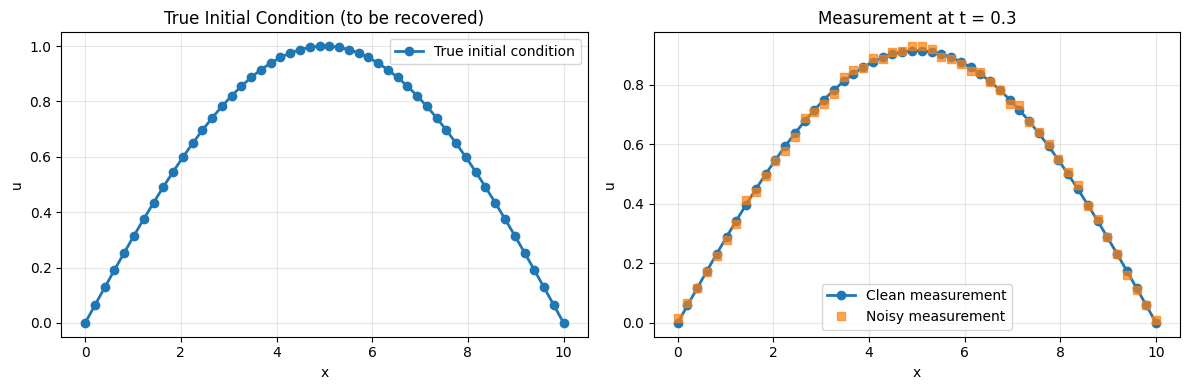

In [ ]:
# ============================================================================
# 9. ADVANCED/OPTIONAL: INVERSE PROBLEM
# ============================================================================
# Goal: Recover initial condition from a measurement at later time

print("="*70)
print("INVERSE PROBLEM: RECONSTRUCTING INITIAL CONDITION")
print("="*70)

# ============================================================================
# Step 1: Generate synthetic measurement data
# ============================================================================

# Choose measurement time (try different values!)
t_measurement = 0.3  # Time when we "measure" the solution

print(f"\nGenerating synthetic measurement at t = {t_measurement}...")

# Number of measurement points
N_measure = 50
x_measure = jnp.linspace(0, L, N_measure)

# "True" initial condition (this is what we want to recover)
u_initial_true = jnp.sin(jnp.pi * x_measure / L)

# Simulated measurement at t_measurement (using analytical solution)
u_measured = jnp.sin(jnp.pi * x_measure / L) * jnp.exp(-D * (jnp.pi / L)**2 * t_measurement)

# Add some noise to make it realistic
noise_level = 0.01
key_noise = random.PRNGKey(123)
noise = noise_level * random.normal(key_noise, u_measured.shape)
u_measured_noisy = u_measured + noise

print(f"  Measurement points: {N_measure}")
print(f"  Noise level: {noise_level}")

# Visualize the data
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_measure, u_initial_true, 'o-', label='True initial condition', linewidth=2)
plt.xlabel('x')
plt.ylabel('u')
plt.title('True Initial Condition (to be recovered)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(x_measure, u_measured, 'o-', label='Clean measurement', linewidth=2)
plt.plot(x_measure, u_measured_noisy, 's', label='Noisy measurement', alpha=0.7)
plt.xlabel('x')
plt.ylabel('u')
plt.title(f'Measurement at t = {t_measurement}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# ============================================================================
# Step 2: Create interpolation function for measurements
# ============================================================================

# Create interpolation function (cubic interpolation)
# Convert JAX arrays to NumPy for scipy compatibility
u_measured_interp = interp1d(np.array(x_measure), np.array(u_measured_noisy), 
                             kind='cubic', fill_value='extrapolate')

def loss_data(params, pinn, points_data, u_interp):
    """
    Loss for matching measurement data at t = t_measurement.
    Replaces L_IC in the inverse problem.
    """
    # Network predictions at measurement time
    predictions = pinn.neural_net(params, points_data)
    
    # Interpolated measurements at the same points
    x_coords = points_data[:, 0]
    u_measured_values = jnp.array([u_interp(x) for x in x_coords]).reshape(-1, 1)
    
    # Mean squared error
    return jnp.mean((predictions - u_measured_values)**2)


def total_loss_inverse(params, pinn, points_interior, points_boundary, 
                       points_data, D, L, u_interp):
    """
    Total loss for inverse problem: L_total = L_PDE + L_BC + L_data
    """
    l_pde = loss_pde(params, pinn, points_interior, D)
    l_bc = loss_bc(params, pinn, points_boundary)
    l_data = loss_data(params, pinn, points_data, u_interp)
    
    total = l_pde + l_bc + l_data
    
    return total, (l_pde, l_bc, l_data)


# ============================================================================
# Step 3: Train PINN for inverse problem
# ============================================================================

def train_pinn_inverse(pinn, geo, D, L, t_measurement, u_interp,
                       n_epochs=10000, N1=1000, N2=200, N_data=200, 
                       learning_rate=5e-4):
    """Train PINN for the inverse problem."""
    
    # Initialize optimizer (lower learning rate for stability)
    optimizer = optax.adam(learning_rate)
    opt_state = optimizer.init(pinn.params)
    
    best_loss = float('inf')
    best_params = pinn.params
    
    loss_history = []
    loss_components = {'pde': [], 'bc': [], 'data': []}
    
    key = random.PRNGKey(42)
    
    print(f"\nTraining inverse PINN for {n_epochs} epochs...")
    print(f"Learning rate: {learning_rate}\n")
    
    for epoch in range(n_epochs):
        key, subkey1, subkey2, subkey3 = random.split(key, 4)
        
        # Sample interior and boundary points (throughout [0, t_measurement])
        points_interior = geo.sample_interior(subkey1, N1)
        points_boundary = geo.sample_boundary(subkey2, N2)
        
        # Sample data points at t = t_measurement
        points_data = geo.sample_at_time(subkey3, N_data, t_measurement)
        
        # Compute loss and gradients
        (loss_val, (l_pde, l_bc, l_data)), grads = jax.value_and_grad(
            total_loss_inverse, has_aux=True
        )(pinn.params, pinn, points_interior, points_boundary, 
          points_data, D, L, u_interp)
        
        # Update parameters
        updates, opt_state = optimizer.update(grads, opt_state)
        pinn.params = optax.apply_updates(pinn.params, updates)
        
        # Track best model
        if loss_val < best_loss:
            best_loss = loss_val
            best_params = pinn.params
        
        # Store history
        loss_history.append(loss_val)
        loss_components['pde'].append(l_pde)
        loss_components['bc'].append(l_bc)
        loss_components['data'].append(l_data)
        
        # Print progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch:5d}: L_total = {loss_val:.6f} | "
                  f"L_PDE = {l_pde:.6f} | L_BC = {l_bc:.6f} | L_data = {l_data:.6f}")
    
    print(f"\nInverse training complete! Best loss: {best_loss:.6f}")
    pinn.params = best_params
    
    return loss_history, loss_components


# Create new PINN for inverse problem
print("\nInitializing new PINN for inverse problem...")
layers_inverse = [2, 30, 30, 30, 1]  # Slightly larger network
key_inverse = random.PRNGKey(999)
pinn_inverse = Pinn(key_inverse, layers_inverse)

# Update geometry to only go up to t_measurement
geo_inverse = Geometry(L=L, N=100, t_start=0.0, t_end=t_measurement, Nt=50)

# Train
loss_history_inv, loss_components_inv = train_pinn_inverse(
    pinn_inverse, geo_inverse, D, L, t_measurement, u_measured_interp,
    n_epochs=1000, N1=1000, N2=200, N_data=200, learning_rate=5e-4
)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(loss_history_inv, linewidth=1.5)
axes[0].set_yscale('log')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Total Loss')
axes[0].set_title('Inverse Problem: Training Loss')
axes[0].grid(True, alpha=0.3)

axes[1].plot(loss_components_inv['pde'], label='L_PDE', linewidth=1.5)
axes[1].plot(loss_components_inv['bc'], label='L_BC', linewidth=1.5)
axes[1].plot(loss_components_inv['data'], label='L_data', linewidth=1.5)
axes[1].set_yscale('log')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss Components')
axes[1].set_title('Individual Loss Components')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




Initializing new PINN for inverse problem...

Training inverse PINN for 10000 epochs...
Learning rate: 0.0005


Training inverse PINN for 10000 epochs...
Learning rate: 0.0005

Epoch     0: L_total = 0.301936 | L_PDE = 0.023058 | L_BC = 0.062313 | L_data = 0.216565
Epoch     0: L_total = 0.301936 | L_PDE = 0.023058 | L_BC = 0.062313 | L_data = 0.216565
Epoch  1000: L_total = 0.000337 | L_PDE = 0.000203 | L_BC = 0.000015 | L_data = 0.000119
Epoch  1000: L_total = 0.000337 | L_PDE = 0.000203 | L_BC = 0.000015 | L_data = 0.000119


Exception: couldn't apply typeof to args: (LinearizeTracer<float32[200,30]>, LinearizeTracer<float32[30,1]>)


RECONSTRUCTION RESULTS

Reconstruction at t = 0 (going back 0.3 in time):
  Mean Absolute Error: 5.000925e-03
  Maximum Error:       1.199690e-02

Reconstruction at t = 0 (going back 0.3 in time):
  Mean Absolute Error: 5.000925e-03
  Maximum Error:       1.199690e-02


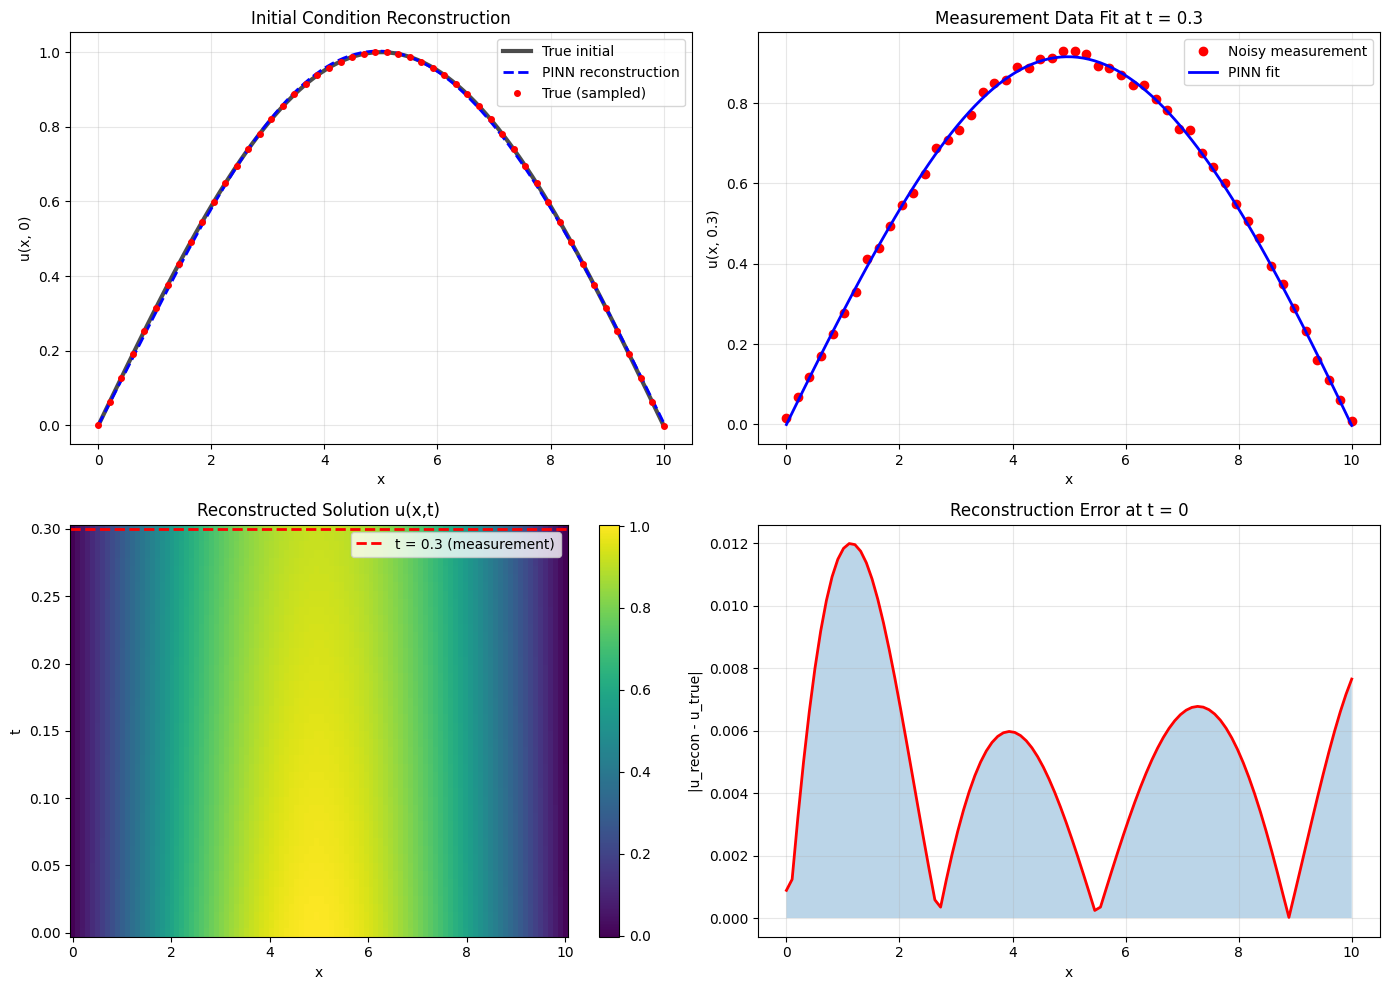


💡 Try changing t_measurement to see how reconstruction quality degrades!
   Current value: 0.3
   Suggested experiments: 0.1, 0.3, 0.5, 1.0, 2.0


In [13]:
# ============================================================================
# Step 4: Evaluate reconstruction
# ============================================================================

print("\n" + "="*70)
print("RECONSTRUCTION RESULTS")
print("="*70)

# Reconstruct initial condition
x_recon = jnp.linspace(0, L, 100)
t_zero = jnp.zeros_like(x_recon)
points_initial_recon = jnp.hstack((x_recon[:, None], t_zero[:, None]))
u_initial_reconstructed = pinn_inverse(points_initial_recon).flatten()

# True initial condition for comparison
u_initial_true_full = jnp.sin(jnp.pi * x_recon / L)

# Compute reconstruction error
recon_mae = jnp.mean(jnp.abs(u_initial_reconstructed - u_initial_true_full))
recon_max_error = jnp.max(jnp.abs(u_initial_reconstructed - u_initial_true_full))

print(f"\nReconstruction at t = 0 (going back {t_measurement} in time):")
print(f"  Mean Absolute Error: {recon_mae:.6e}")
print(f"  Maximum Error:       {recon_max_error:.6e}")
print("="*70)

# Visualize reconstruction
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Initial condition reconstruction
axes[0, 0].plot(x_recon, u_initial_true_full, 'k-', 
                label='True initial', linewidth=3, alpha=0.7)
axes[0, 0].plot(x_recon, u_initial_reconstructed, 'b--', 
                label='PINN reconstruction', linewidth=2)
axes[0, 0].plot(x_measure, u_initial_true, 'ro', 
                label='True (sampled)', markersize=4)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('u(x, 0)')
axes[0, 0].set_title('Initial Condition Reconstruction')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Measurement fit
x_meas_dense = jnp.linspace(0, L, 100)
t_meas_dense = jnp.full_like(x_meas_dense, t_measurement)
points_meas = jnp.hstack((x_meas_dense[:, None], t_meas_dense[:, None]))
u_meas_pred = pinn_inverse(points_meas).flatten()

axes[0, 1].plot(x_measure, u_measured_noisy, 'ro', 
                label='Noisy measurement', markersize=6)
axes[0, 1].plot(x_meas_dense, u_meas_pred, 'b-', 
                label='PINN fit', linewidth=2)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel(f'u(x, {t_measurement})')
axes[0, 1].set_title(f'Measurement Data Fit at t = {t_measurement}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Full solution in (x,t) space
x_full = geo_inverse.x
t_full = geo_inverse.t
X_full, T_full = jnp.meshgrid(x_full, t_full)
XT_full = jnp.hstack((X_full.flatten()[:, None], T_full.flatten()[:, None]))
u_inverse_full = pinn_inverse(XT_full).reshape(X_full.shape)

im = axes[1, 0].pcolormesh(X_full, T_full, u_inverse_full, shading='auto', cmap='viridis')
axes[1, 0].axhline(t_measurement, color='red', linestyle='--', 
                   linewidth=2, label=f't = {t_measurement} (measurement)')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('t')
axes[1, 0].set_title('Reconstructed Solution u(x,t)')
axes[1, 0].legend()
plt.colorbar(im, ax=axes[1, 0])

# 4. Reconstruction error
error_recon = jnp.abs(u_initial_reconstructed - u_initial_true_full)
axes[1, 1].plot(x_recon, error_recon, 'r-', linewidth=2)
axes[1, 1].fill_between(x_recon, 0, error_recon, alpha=0.3)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('|u_recon - u_true|')
axes[1, 1].set_title('Reconstruction Error at t = 0')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 Try changing t_measurement to see how reconstruction quality degrades!")
print(f"   Current value: {t_measurement}")
print(f"   Suggested experiments: 0.1, 0.3, 0.5, 1.0, 2.0")